# Problem Set 6

# Naïve Bayes

## INFO 371

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import math

## 1. (7pt) Load and clean data

1. (1pt) Load and clean data. Feel free to copy-paste from your PS05 solution.

In [375]:
emails = pd.read_csv('/Users/romilkinger/Downloads/lingspam-emails.csv.bz2', sep='\t')
emails.head()

,spam,files,message
0,False,3-1msg1.txt,Subject: re : 2 . 882 s - > np np > date : su...
1,False,3-1msg2.txt,Subject: s - > np + np the discussion of s - ...
2,False,3-1msg3.txt,Subject: 2 . 882 s - > np np . . . for me it ...
3,False,3-375msg1.txt,"Subject: gent conference "" for the listserv ""..."
4,False,3-378msg1.txt,Subject: query : causatives in korean could a...


In [376]:
# clean the data - ps5

In [377]:
emails.isna().sum()

spam       0
files      0
message    0
dtype: int64

In [378]:
emails.shape

(2893, 3)

2. (2pt) Vectorize emails so you have a DTM (I’ll refer to this as the design matrix X) and the
spam/non-spam indicator y

In [379]:
vectorizer = CountVectorizer(binary=True)
# define vectorizer
X = vectorizer.fit_transform(emails.message)
# vectorize your data. Note: this creates a sparse matrix, # use .toarray() if you run into trouble
vocabulary = vectorizer.get_feature_names()
# in case you want to see what are the actual words

In [380]:
len(vocabulary)

60925

In [381]:
X.shape

(2893, 60925)

In [382]:
emails.shape

(2893, 3)

3. How many different documents (emails) and different tokens (words) do you have in these data? (2pt) Split data into training/validation chunk

there are 2893 documents (emails) and 60925 tokens (words) in this data.

In [383]:
y = emails.spam

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

4.
(2pt) Design a scheme to name your variables so you can understand (and you grader can understand too!) which mathematical concept it refers to. You need variables like (see Lecture notes, Ch 7.3 for more examples/explanations):

• Pr(S = 1): probability of spam

• Pr(S = 0|W = 1): probability the email is not spam given it cointains the word W 

• log Pr(W = 1): log probability of word present

• l(S = 1|W): log-likelihood of email being spam, given vector of words it contains.
Explain how do you name these examples values.

schema for variables: 
    
    - Pr(s=1) = pr_s1
    - Pr(s=0|w=1) = pr_s0w1
    - log Pr(W=1) = lpr_w1
    - l(S=1 | W) = l_s1w

I choose this schema because it is consistent with the mathematical notation and easily interpretable by humans.

## 2. (42pt) Naïve Bayes
 

1. (4pt) Here is a small excerpt from the initial DTM (before you split it into training/validation), corresponding to rows 983 to 985, and to columns 40,042–40,046:

In [385]:
X[982:985, 40041:40046].toarray()
# array([[0, 0, 0, 0, 0],
#        [0, 1, 0, 1, 0],
#        [0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0]])

In [386]:
vocabulary[40041:40046]

['nooteboom', 'nootka', 'nope', 'nor', 'nora']

(a) which emails do the rows correspond to?

the rows correspond to emails 982, 983, 984

(b) Which words do the columns correspond to?

the words correspond to ['nooteboom', 'nootka', 'nope', 'nor', 'nora']

(c) What do the “1”-s in the middle of the table mean? 

1s in the middle of the table means that those words exists in those corresponding emails.

(d) What do the zeros mean?

zeros mean that those words don't exists in those corresponding emails.

2. (2pt) What is the accuracy of the naive model that predicts all emails into the majority category?

In [466]:
(y == False).mean()

0.8337366055997235

the accuracy of model that predicts all emails into the majority category is 16%.

3. (3pt) Compute the unconditional (log) probability that the email is spam/non-spam, log Pr(S = 1), and log Pr(S = 0). These probabilities are based on the values of y (i.e. spam) alone. They do not contain information about the words in emails.


In [388]:
lpr_s1 = math.log((y_train == True).mean())
lpr_s1

-1.790895538288791

In [389]:
lpr_s0 = math.log((y_train == False).mean())
lpr_s0

-0.1824944325831309

4. (8pt) For each word w, compute the (log) probability that the word is present in spam emails, log Pr(W = 1|S = 1), and (log) probability that the word is present in non-spam emails, log Pr(W = 1|S = 0). These probabilities can easily be calculated from counts of how many times these words are present for each class.
Hint: these computations are based on your BOW-s X. Look at ways to sum along columns in this matrix.

In [390]:
#first check the size to understand that there are 60925 words 
#therefore the result of pr_w1s1 should also have this many words.

In [391]:
X.shape

(2893, 60925)

In [392]:
#out of 2893 rows of email data, get all the spam indices

In [393]:
spam_index = np.where(y_train == True)

In [394]:
len(spam_index[0]) 

386

In [395]:
# now we know there are 393 emails in the training set of 2314

In [396]:
total_scam = (y_train == True).sum()
total_scam

386

In [397]:
total_no_scam = (y_train == False).sum()
total_no_scam

1928

In [398]:
# important to remember that we have to calculate log pr(w = 1 | s=1) 
# so first we calculated all the number of spam emails in the training set #totol_scam
# second we create an array of spam emails only to calculate the occurence of each word in spam emails
# third we divide the occurence of each word (60925 words) by total spams emails to get probability
# fourth we apply log on them

In [399]:
# puts all the spam emails in a list
spam_emails = []
for i in range(X_train.shape[0]):
    if (i in spam_index[0]):
        spam_emails.append(X_train[i,:].toarray().flatten())
    if (i % 1000 == 0):
        print (i/1000)

0.0
1.0
2.0


In [400]:
# turns that list into an array for easier calculations on columns
spam_emails_arr = np.array(spam_emails)

In [401]:
len(spam_emails) #list

386

In [402]:
spam_emails #list

[array([1, 1, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([1, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [403]:
spam_emails_arr.shape

(386, 60925)

In [404]:
# caculate the sum of each word in spam emails and put that sum in the list
sum_w1s1 = []
for i in range(spam_emails_arr.shape[1]):
    sum_w1s1.append((spam_emails_arr[:,i]).sum())

In [405]:
#for testing purpose
spam_emails_arr[:,0].sum() # sum of first word

126

In [406]:
len(sum_w1s1) #total number of words

60925

In [407]:
# turn the sum list into an array
sum_w1s1_arr = np.array(sum_w1s1)

In [408]:
sum_w1s1_arr.shape

(60925,)

In [409]:
# divide each word's sum by total scam emails to get probability
pr_w1s1 = sum_w1s1_arr / total_scam

In [410]:
pr_w1s1.shape

(60925,)

In [411]:
# get their log

In [412]:
lpr_w1s1 = np.log(pr_w1s1)

/var/folders/py/d4bm7t3x453fztx7pd3j6w1r0000gn/T/ipykernel_11126/2162149394.py:1: RuntimeWarning: divide by zero encountered in log
  lpr_w1s1 = np.log(pr_w1s1)


In [413]:
lpr_w1s1

array([-1.11955546, -1.1355558 , -5.95583737, ...,        -inf,
       -5.95583737,        -inf])

In [414]:
# there are 0 in sum_w1s1 and by apply log on them, they become -inf
# for likelihood we compare the a > b 

In [415]:
# now repeat the same process for log Pr(w=1|s=0)

In [416]:
non_spam_index = np.where(y_train == False)

In [417]:
# puts all the non spam emails in a list
not_spam_emails = []
for i in range(X_train.shape[0]):
    if (i in non_spam_index[0]):
        not_spam_emails.append(X_train[i,:].toarray().flatten())
    if (i % 1000 == 0):
        print (i/1000)

0.0
1.0
2.0


In [418]:
# turns that list into an array for easier calculations on columns
not_spam_emails_arr = np.array(not_spam_emails)

In [419]:
not_spam_emails_arr.shape

(1928, 60925)

In [420]:
# caculate the sum of each word in non spam emails and put that sum in the list
sum_w1s0 = []
for i in range(not_spam_emails_arr.shape[1]):
    sum_w1s0.append((not_spam_emails_arr[:,i]).sum())
sum_w1s0_arr = np.array(sum_w1s0)

In [421]:
# divide each word's sum by total non scam emails to get probability
pr_w1s0 = sum_w1s0_arr / total_no_scam

In [422]:
lpr_w1s0 = np.log(pr_w1s0)

/var/folders/py/d4bm7t3x453fztx7pd3j6w1r0000gn/T/ipykernel_11126/2915524138.py:1: RuntimeWarning: divide by zero encountered in log
  lpr_w1s0 = np.log(pr_w1s0)


In [426]:
lpr_w1s0

array([-1.84065337, -3.0424499 , -7.56423848, ..., -7.56423848,
              -inf,        -inf])

5. (1pt) What should be the dimension of your log Pr(W = 1|S = 0) and log Pr(W = 1|S = 1) vectors? Explain!

the dimensions of log Pr(w=1|s=0) and log Pr(w=1|s=1) should be 60925 because that's the total number of words.

Now we are done with the estimator. Your fitted model is completely described by these four probability vectors: logPr(S = 1),logPr(S = 1),logPr(W = 1|S = 1),logPr(W = 1|S = 0).

In [427]:
lpr_s1

-1.790895538288791

In [428]:
lpr_s0

-0.1824944325831309

In [432]:
lpr_w1s1

array([-1.11955546, -1.1355558 , -5.95583737, ...,        -inf,
       -5.95583737,        -inf])

In [433]:
lpr_w1s0

array([-1.84065337, -3.0424499 , -7.56423848, ..., -7.56423848,
              -inf,        -inf])

Let’s now pull out your validation data and do some predictions.

6. (10pt) For both classes, S = 1 and S = 0, compute the log-likelihood that the email belongs to this class. 


Log-likelihood is given as (7.3.20 and 7.3.21, page 270 for now) in lecture notes, and the equations in Schutt “Doing Data Science”, page 102.


Computing the likelihoods involves sums of the previously computed probabilities, log Pr(W = 1|S), and BOW elements xij. Start by doing this by whatever way you can get it done (e.g. loops). The most important thing is that you understand what you do!


But if you want to write efficient code, use matrix product instead (it is ∼ 1000× faster than loops). See Lecture Notes (7.30.30) for how to do it with matrix product. You can also check out np.apply_along_axis as an alternative way to do it.

In [438]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [450]:
l_s1w = lpr_s1 + (lpr_w1s1 @ X_test.T)
l_s1w.shape

(579,)

In [449]:
l_s0w = lpr_s0 + (lpr_w1s0 @ X_test.T)
l_s0w.shape

(579,)

7. (2pt) How many log-likelihoods you have to compute? Explain why do you have to have this many log-likelihoods.



I had to compute two set of log-likelihood: log-likelihood of email being spam given the word and log-likelihood of email not being spam given the word. Both of which contained 579 emails as that was the testing/validation data.

8. (7pt) Based on the log-likelihoods, predict the class S = 1 or S = 0 for each email in the validation set.



In [458]:
y_hat = (l_s1w > l_s0w)

9. (3pt) Print the resulting confusion matrix and accuracy (feel free to use existing libraries).



In [462]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [463]:
confusion_matrix(y_test, y_hat)

array([[484,   0],
       [ 85,  10]])

In [464]:
print('Accuracy: ',accuracy_score(y_test, y_hat))

Accuracy:  0.853195164075993


10. (5pt) If your results are like mine, you can see that the results are not impressive at all, your model works no better than the naive guess. Explain why do you get such mediocre results.

Hint: this is related to infinites, where are those coming from, and why they make the model useless? See also the smoothing-related discussion in Lecture Notes at the end of the Naive Bayes (Section 7.3.3), before Example 7.3.
Note: just explain, but do not do anything about it! We’ll attack the problem in the next question with smoothing.

Since there are some words that occur only in one or more class therefore the predictions based on those words would result in 100% as spam or not spam, which can be see by -inf in our prediction log likelihood. Therefore the accuracy is only as good as naive guess.

## 3. (32pt) Add smoothing

So, now you have your brand-new NB algorithm up and running. But the results are not impressive... As a next step, we add smoothing to the model.

1. (2pt) As you will be doing validation below, your first task is to mold what you did above into two functions: one for fitting and another one for predicting. You can mostly copy-paste your code from above.

In [484]:
# not putting total spam / non-spam emails, spam/nonspam index
def fitting():
    # puts all the spam emails in a list
    lpr_s0 = math.log((y_train == False).mean())
    lpr_s1 = math.log((y_train == True).mean())
    total_scam = (y_train == True).sum()
    total_no_scam = (y_train == False).sum()
    spam_index = np.where(y_train == True)
    non_spam_index = np.where(y_train == False)
    #finding lpr_w1s1 spam emails
    spam_emails = []
    for i in range(X_train.shape[0]):
        if (i in spam_index[0]):
            spam_emails.append(X_train[i,:].toarray().flatten())
    spam_emails_arr = np.array(spam_emails)
    sum_w1s1 = []
    for i in range(spam_emails_arr.shape[1]):
        sum_w1s1.append((spam_emails_arr[:,i]).sum())
    sum_w1s1_arr = np.array(sum_w1s1)
    pr_w1s1 = sum_w1s1_arr / total_scam 
    lpr_w1s1 = np.log(pr_w1s1)
    #finding lpr_w1s0 non-spam emails
    not_spam_emails = []
    for i in range(X_train.shape[0]):
        if (i in non_spam_index[0]):
            not_spam_emails.append(X_train[i,:].toarray().flatten())
    not_spam_emails_arr = np.array(not_spam_emails)
    sum_w1s0 = []
    for i in range(not_spam_emails_arr.shape[1]):
        sum_w1s0.append((not_spam_emails_arr[:,i]).sum())
    sum_w1s0_arr = np.array(sum_w1s0)
    pr_w1s0 = sum_w1s0_arr / total_no_scam 
    lpr_w1s0 = np.log(pr_w1s0)

In [485]:
def prediction():
    l_s1w = lpr_s1 + (lpr_w1s1 @ X_test.T)
    l_s0w = lpr_s0 + (lpr_w1s0 @ X_test.T)
    y_hat = (l_s1w > l_s0w)

2. (18pt) Add smoothing to the model. Smoothing amounts to assuming that we have “seen” every possible word α ⩾ 0 times already, in both spam and non-spam emails. Note that α does not have to be an integer, and typically the best α < 1.

What you have to do is to re-compute the probabilities logPr(S = 1),logPr(S = 0),logPr(W = 1|S = 1),logPr(W = 1|S = 1), the predictions part will remain unchanged. So you should up- date your fitting function by adding an additional argument α to it, and modify the probabilities accordingly. (And you use only training data for this.)
See Lecture Notes 7.3.2; Example 7.3 (page 274); and Schutt p 103 and p 109 for more explanations.

In [662]:
def fitting(smoothing):
    smooth_lpr_s1 = np.log((len(y_train[y_train == True]) + smoothing) / len(y_train) + 2 * smoothing)
    smooth_lpr_s0 = np.log((len(y_train[y_train == False]) + smoothing) / len(y_train) + 2 * smoothing)


    smooth_lpr_w1s1 = np.log((np.sum(X_train[y_train==True], axis=0) + smoothing) / 
                     (np.sum(y_train == True) + 2 * smoothing))

    smooth_lpr_w1s0 = np.log((np.sum(X_train[y_train==False], axis=0) + smoothing) / 
                     (np.sum(y_train == False) + 2 * smoothing))
    return smooth_lpr_s1, smooth_lpr_s0, smooth_lpr_w1s1, smooth_lpr_w1s0

3. (5pt) Use your updated model for predictions with a few different α-values (on validation data) and report the corresponding confusion matrix and accuracy.
A well-implemented algorith should not spend more than a few seconds on both fitting and predict- ing. However, more important that you understand what you are doing!

In [663]:
def prediction():
    smooth_l_s1w = smooth_lpr_s1 + (smooth_lpr_w1s1 @ X_test.T)
    smooth_l_s0w = smooth_lpr_s0 + (smooth_lpr_w1s0 @ X_test.T)
    y_hat = (smooth_l_s1w > smooth_l_s0w)
    y_hat, = np.array(y_hat)
    con_matrix = confusion_matrix(y_test, y_hat) 
    return accuracy_score(y_test, y_hat)

In [669]:
smooth_lpr_s1, smooth_lpr_s0, smooth_lpr_w1s1, smooth_lpr_w1s0 = fitting(0.1)
print(prediction())

0.9861830742659758


4. 
(5pt) Use validation to find the best smoothing parameter α.
You can just run a loop over different values, but start with very small values (10−8, 10−7, 10−6 up
to perhaps 10).
Note: this is fairly fast if your algorithm is fast. But even if your algorithm is slow, do the best you can!
If your results are like mine, your best accuracy will be > 99.5%. (But this result is random!)

In [672]:
accuracy = []
for i in np.arange(0,10,0.1):
    smooth_lpr_s1, smooth_lpr_s0, smooth_lpr_w1s1, smooth_lpr_w1s0 = fitting(i)
    accuracy.append(prediction())
accuracy

/var/folders/py/d4bm7t3x453fztx7pd3j6w1r0000gn/T/ipykernel_11126/3722585712.py:6: RuntimeWarning: divide by zero encountered in log
  smooth_lpr_w1s1 = np.log((np.sum(X_train[y_train==True], axis=0) + smoothing) /
/var/folders/py/d4bm7t3x453fztx7pd3j6w1r0000gn/T/ipykernel_11126/3722585712.py:9: RuntimeWarning: divide by zero encountered in log
  smooth_lpr_w1s0 = np.log((np.sum(X_train[y_train==False], axis=0) + smoothing) /


[0.853195164075993,
 0.9861830742659758,
 0.9723661485319517,
 0.9568221070811744,
 0.9516407599309153,
 0.9430051813471503,
 0.9291882556131261,
 0.9153713298791019,
 0.9032815198618307,
 0.8911917098445595,
 0.8860103626943006,
 0.8791018998272885,
 0.8652849740932642,
 0.8514680483592401,
 0.842832469775475,
 0.8307426597582038,
 0.8186528497409327,
 0.8031088082901554,
 0.7927461139896373,
 0.7772020725388601,
 0.7599309153713298,
 0.7495682210708118,
 0.7374784110535406,
 0.7236614853195165,
 0.7167530224525043,
 0.694300518134715,
 0.6735751295336787,
 0.6580310880829016,
 0.6528497409326425,
 0.6321243523316062,
 0.6200345423143351,
 0.6010362694300518,
 0.5872193436960277,
 0.5837651122625216,
 0.5664939550949913,
 0.5526770293609672,
 0.5492227979274611,
 0.538860103626943,
 0.5250431778929189,
 0.5112262521588946,
 0.5060449050086355,
 0.5025906735751295,
 0.49222797927461137,
 0.4905008635578584,
 0.48013816925734026,
 0.47322970639032813,
 0.46632124352331605,
 0.4628670120

5. (2pt) Plot how accuracy depends on α. Use log-scale for α!

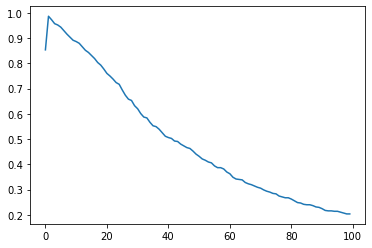

In [673]:
plt.plot(accuracy)

## (20pt) Interpretation
 

Naive Bayes is interpretable in a little similar fashion like linear regression. But in only a little similar fashion. Namely, we can find the words that are the best predictors that an email is spam, and the best predictors that email is non-spam. And we want to look at reasonably common words only, say more frequent than 10 times in the data.


1. (10pt) Which words are the best predictors that an email is spam? These are the word where Pr(S = 1|W = 1) is large and Pr(S = 0|W = 1) is small, or to put it differently, where log Pr(S = 1|W = 1)−logPr(S = 0|W = 1) is large. Explain why this is the case. Hint: you may re-check the concept of log-likelihood and how that is used for prediction. Hint 2: you may imagine you receive 60k 1-word emails (one for each word in your vocabulary). Which ones are most likely spam, and which ones are least likely spam?

In [747]:
high_spam_index = np.where((smooth_lpr_w1s1 - smooth_lpr_w1s0 > 6) == True)

In [748]:
high_spam_index[1].shape

(121,)

In [749]:
high_spam_index[1]

array([  808,   837,  1086,  2322,  6444,  7340,  8070,  8861,  8938,
        9481,  9852, 10372, 11052, 11423, 11647, 12714, 13248, 14200,
       14234, 14236, 14814, 15016, 15149, 16107, 16281, 16350, 17023,
       17242, 17904, 19271, 19278, 19573, 19771, 19772, 20491, 20511,
       21389, 21435, 21877, 22288, 22391, 22479, 23020, 23353, 24420,
       25149, 25964, 27568, 27910, 27972, 29339, 29663, 30113, 30163,
       30184, 30187, 31413, 31442, 35010, 35564, 36056, 36562, 36957,
       37396, 37755, 38273, 38470, 38694, 41555, 41565, 41612, 41624,
       42269, 42661, 43853, 44382, 44653, 44751, 44811, 44907, 46144,
       46240, 46353, 46620, 46747, 46875, 47131, 47134, 47310, 47332,
       47706, 47825, 47880, 47961, 49020, 49500, 49649, 49753, 50001,
       51321, 51565, 51659, 51811, 51858, 52068, 52244, 52442, 53256,
       54171, 54507, 55397, 56722, 56723, 57094, 57710, 58740, 58875,
       59123, 59592, 59983, 60255])

In [750]:
high_spam_words = []
for i in range(len(vocabulary)):
    if i in high_spam_index[1]:
        high_spam_words.append(vocabulary[i])

In [751]:
high_spam_words

['1302',
 '1341',
 '1618',
 '3005',
 'advertiser',
 'amazed',
 'anytime',
 'assets',
 'astonishment',
 'awesome',
 'bankruptcies',
 'believer',
 'biz',
 'bonus',
 'boyfriend',
 'capitalfm',
 'celebrity',
 'classifieds',
 'cleaned',
 'cleanest',
 'commercialemail',
 'complies',
 'concealed',
 'costing',
 'crammed',
 'creditors',
 'dare',
 'debts',
 'desirous',
 'downline',
 'downpayment',
 'duplicates',
 'earning',
 'earnings',
 'emailamendtext',
 'embark',
 'esq',
 'estate',
 'excited',
 'fabulous',
 'fairchild',
 'fantastic',
 'filtered',
 'fm',
 'gambling',
 'girlfriend',
 'grumbled',
 'hobby',
 'hottest',
 'hrs',
 'inflation',
 'instant',
 'intrusion',
 'invested',
 'investing',
 'investments',
 'jumped',
 'juno',
 'lottery',
 'mailers',
 'marketer',
 'mci',
 'merciless',
 'millionaires',
 'mlm',
 'mortgage',
 'msn',
 'murkowski',
 'overflowing',
 'overloaded',
 'owed',
 'owning',
 'paste',
 'percentages',
 'porn',
 'premium',
 'privacy',
 'prodigy',
 'profits',
 'promotional',
 're

Since we are calculating log-likehood of an email being spam with a certain and log-likelihood of an email not being spam with that word, we can compare the two likelihoods and by using the difference in likelihood, we can find the words where the diffrence is greater therefore emails with those words are more likely to be spam.


2. (10pt) Find 10 best words to predict spam and 10 best words to predict non-spam. Comment your results.

In [768]:
high_spam_index = np.where((smooth_lpr_w1s1 - smooth_lpr_w1s0 > 6.92) == True)
high_spam_index[1].shape
high_spam_words = []
for i in range(len(vocabulary)):
    if i in high_spam_index[1]:
        high_spam_words.append(vocabulary[i])

In [769]:
high_spam_words

['bonus',
 'debts',
 'earning',
 'fantastic',
 'hottest',
 'mlm',
 'profits',
 'relax',
 'resell',
 'secrets',
 'spam',
 'stealth']